<a href="https://colab.research.google.com/github/kimmiso726/DataScience/blob/main/%EA%B0%9C%EC%9D%B8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%9C%A0%EA%B8%B0%EB%8F%99%EB%AC%BC_%ED%98%84%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **서울시 유기동물 데이터 분석하기**



1.   년도별 강아지+고양이 유기된 합계
2.   각 자치구마다 유기견, 유기묘 최대, 최소 안락사되는 비율
3.   어느 자치구에서 가장 많이 유기되는지
4.   가장 적게 유기되는 자치구와 반려동물등록현황과 관련이 있는지
5.   유기견, 유기묘가 원래 주인에게 인도되는 비율
6.   강아지 유기된 비율 vs 고양이 유기된 비율(합계만 뽑아서..비율)


In [2]:
import pandas as pd
df=pd.read_csv('/content/Seoul_Abandoned_Pet.csv', index_col=2)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(10,4)
plt.rcParams['figure.dpi']=200
plt.style.use('ggplot')

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 합계 to 강동구
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  468 non-null    int64  
 1   기간          468 non-null    int64  
 2   전체 합계       468 non-null    int64  
 3   연도 개 계      468 non-null    int64  
 4   개인도(주인)     468 non-null    int64  
 5   개 입양분양      468 non-null    int64  
 6   개 폐사안락사     468 non-null    object 
 7   개 계류기증      468 non-null    object 
 8   연도 고양이 계    468 non-null    int64  
 9   고양이 인도(주인)  468 non-null    object 
 10  고양이 입양분양    468 non-null    object 
 11  고양이 폐사안락사   468 non-null    int64  
 12  고양이 계류기증    468 non-null    object 
 13  연도 기타       468 non-null    object 
 14  합계          468 non-null    object 
 15  기타 인도(주인)   468 non-null    object 
 16  기타 입양분양     468 non-null    object 
 17  기타 폐사안락사    468 non-null    object 
 18  기타 계류기증     0 non-null      float64
dtypes: float64(1), int64(8), object(1

In [5]:
df.head()

,Unnamed: 0,기간,전체 합계,연도 개 계,개인도(주인),개 입양분양,개 폐사안락사,개 계류기증,연도 고양이 계,고양이 인도(주인),고양이 입양분양,고양이 폐사안락사,고양이 계류기증,연도 기타,합계,기타 인도(주인),기타 입양분양,기타 폐사안락사,기타 계류기증
자치구,,,,,,,,,,,,,,,,,,,
합계,0,2003,7389,5085,143,644,2401,1897,2292,20,150,1609,513,12,0,5,2,5,NaN
종로구,1,2003,153,107,1,29,24,53,46,0,1,30,15,0,0,0,0,0,NaN
중구,2,2003,187,103,1,5,52,45,84,0,3,56,25,0,0,0,0,0,NaN
용산구,3,2003,233,130,0,12,73,45,103,0,5,85,13,0,0,0,0,0,NaN
성동구,4,2003,127,119,3,0,33,83,8,0,0,3,5,0,0,0,0,0,NaN


In [6]:
col = df.columns
for i in col:
  if i != "자치구" or i != "기간":
    print(df[i])
    df[i] = df[i].replace('-', '0')
    df[i]=df[i].astype("float64")

자치구
합계       0
종로구      1
중구       2
용산구      3
성동구      4
      ... 
관악구    463
서초구    464
강남구    465
송파구    466
강동구    467
Name: Unnamed: 0, Length: 468, dtype: int64
자치구
합계     2003
종로구    2003
중구     2003
용산구    2003
성동구    2003
       ... 
관악구    2020
서초구    2020
강남구    2020
송파구    2020
강동구    2020
Name: 기간, Length: 468, dtype: int64
자치구
합계     7389
종로구     153
중구      187
용산구     233
성동구     127
       ... 
관악구     693
서초구     163
강남구     254
송파구     258
강동구     379
Name: 전체 합계, Length: 468, dtype: int64
자치구
합계     5085
종로구     107
중구      103
용산구     130
성동구     119
       ... 
관악구     301
서초구      94
강남구     136
송파구     140
강동구     190
Name: 연도 개 계, Length: 468, dtype: int64
자치구
합계     143
종로구      1
중구       1
용산구      0
성동구      3
      ... 
관악구    149
서초구     27
강남구     50
송파구     64
강동구     98
Name: 개인도(주인), Length: 468, dtype: int64
자치구
합계     644
종로구     29
중구       5
용산구     12
성동구      0
      ... 
관악구    138
서초구     20
강남구     56
송파구     35
강동구     54
Name: 개 입양분양, Len

In [7]:
del df['기타 계류기증'], df['Unnamed: 0'] # NAN값이 있는 기타계류기증과 무의미한 언네임 열 삭제

In [8]:
df.head()

,기간,전체 합계,연도 개 계,개인도(주인),개 입양분양,개 폐사안락사,개 계류기증,연도 고양이 계,고양이 인도(주인),고양이 입양분양,고양이 폐사안락사,고양이 계류기증,연도 기타,합계,기타 인도(주인),기타 입양분양,기타 폐사안락사
자치구,,,,,,,,,,,,,,,,,
합계,2003.0,7389.0,5085.0,143.0,644.0,2401.0,1897.0,2292.0,20.0,150.0,1609.0,513.0,12.0,0.0,5.0,2.0,5.0
종로구,2003.0,153.0,107.0,1.0,29.0,24.0,53.0,46.0,0.0,1.0,30.0,15.0,0.0,0.0,0.0,0.0,0.0
중구,2003.0,187.0,103.0,1.0,5.0,52.0,45.0,84.0,0.0,3.0,56.0,25.0,0.0,0.0,0.0,0.0,0.0
용산구,2003.0,233.0,130.0,0.0,12.0,73.0,45.0,103.0,0.0,5.0,85.0,13.0,0.0,0.0,0.0,0.0,0.0
성동구,2003.0,127.0,119.0,3.0,0.0,33.0,83.0,8.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 합계 to 강동구
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기간          468 non-null    float64
 1   전체 합계       468 non-null    float64
 2   연도 개 계      468 non-null    float64
 3   개인도(주인)     468 non-null    float64
 4   개 입양분양      468 non-null    float64
 5   개 폐사안락사     468 non-null    float64
 6   개 계류기증      468 non-null    float64
 7   연도 고양이 계    468 non-null    float64
 8   고양이 인도(주인)  468 non-null    float64
 9   고양이 입양분양    468 non-null    float64
 10  고양이 폐사안락사   468 non-null    float64
 11  고양이 계류기증    468 non-null    float64
 12  연도 기타       468 non-null    float64
 13  합계          468 non-null    float64
 14  기타 인도(주인)   468 non-null    float64
 15  기타 입양분양     468 non-null    float64
 16  기타 폐사안락사    468 non-null    float64
dtypes: float64(17)
memory usage: 65.8+ KB


In [10]:
df.tail()

,기간,전체 합계,연도 개 계,개인도(주인),개 입양분양,개 폐사안락사,개 계류기증,연도 고양이 계,고양이 인도(주인),고양이 입양분양,고양이 폐사안락사,고양이 계류기증,연도 기타,합계,기타 인도(주인),기타 입양분양,기타 폐사안락사
자치구,,,,,,,,,,,,,,,,,
관악구,2020.0,693.0,301.0,149.0,138.0,9.0,5.0,359.0,5.0,284.0,67.0,3.0,33.0,2.0,29.0,2.0,0.0
서초구,2020.0,163.0,94.0,27.0,20.0,44.0,3.0,54.0,0.0,4.0,42.0,8.0,15.0,0.0,12.0,3.0,0.0
강남구,2020.0,254.0,136.0,50.0,56.0,23.0,7.0,109.0,5.0,18.0,76.0,10.0,9.0,2.0,6.0,1.0,0.0
송파구,2020.0,258.0,140.0,64.0,35.0,31.0,10.0,110.0,0.0,19.0,90.0,1.0,8.0,1.0,6.0,1.0,0.0
강동구,2020.0,379.0,190.0,98.0,54.0,28.0,10.0,176.0,2.0,69.0,70.0,35.0,13.0,2.0,11.0,0.0,0.0


In [11]:
df.head()

,기간,전체 합계,연도 개 계,개인도(주인),개 입양분양,개 폐사안락사,개 계류기증,연도 고양이 계,고양이 인도(주인),고양이 입양분양,고양이 폐사안락사,고양이 계류기증,연도 기타,합계,기타 인도(주인),기타 입양분양,기타 폐사안락사
자치구,,,,,,,,,,,,,,,,,
합계,2003.0,7389.0,5085.0,143.0,644.0,2401.0,1897.0,2292.0,20.0,150.0,1609.0,513.0,12.0,0.0,5.0,2.0,5.0
종로구,2003.0,153.0,107.0,1.0,29.0,24.0,53.0,46.0,0.0,1.0,30.0,15.0,0.0,0.0,0.0,0.0,0.0
중구,2003.0,187.0,103.0,1.0,5.0,52.0,45.0,84.0,0.0,3.0,56.0,25.0,0.0,0.0,0.0,0.0,0.0
용산구,2003.0,233.0,130.0,0.0,12.0,73.0,45.0,103.0,0.0,5.0,85.0,13.0,0.0,0.0,0.0,0.0,0.0
성동구,2003.0,127.0,119.0,3.0,0.0,33.0,83.0,8.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 자치구랑 총합계  (막대그래프)
# 자치구 x축 총합계 y축
df.groupby(['기간', '전체 합계'])
df_all_sum = df[['기간','전체 합계']]

In [13]:
df_all_sum.reset_index()

,자치구,기간,전체 합계
0,합계,2003.0,7389.0
1,종로구,2003.0,153.0
2,중구,2003.0,187.0
3,용산구,2003.0,233.0
4,성동구,2003.0,127.0
...,...,...,...
463,관악구,2020.0,693.0
464,서초구,2020.0,163.0
465,강남구,2020.0,254.0
466,송파구,2020.0,258.0


In [14]:
df_all_sum

,기간,전체 합계
자치구,,
합계,2003.0,7389.0
종로구,2003.0,153.0
중구,2003.0,187.0
용산구,2003.0,233.0
성동구,2003.0,127.0
...,...,...
관악구,2020.0,693.0
서초구,2020.0,163.0
강남구,2020.0,254.0


In [15]:
# 2003년부터 2020년까지의 자치구 별 유기동물 합계

df_ex = df_all_sum.reset_index()
df_ex = df_ex[['자치구','전체 합계']].groupby(by=['자치구'], as_index=False).sum()
df_ex = df_ex.iloc[:25,:]
df_ex

,자치구,전체 합계
0,강남구,8727.0
1,강동구,10841.0
2,강북구,8862.0
3,강서구,11399.0
4,관악구,15167.0
5,광진구,9528.0
6,구로구,8184.0
7,금천구,5146.0
8,노원구,7449.0
9,도봉구,7273.0


지도에 서울시 자치구 별 유기동물 표현하기

In [16]:
import folium
# 코랩에서 제공하는 Folium 버전 확인
folium.__version__

'0.8.3'

# 1. 2003~2020년까지 각 자치구 별 유기동물 전체 합계를 그래프로 나타내기

In [17]:
import plotly.express as px
fig = px.bar(df_ex, x='자치구', y='전체 합계', color='자치구')
fig.show()

**유기동물이 가장 많은 자치구 순위**

1.   **관악구**

2.   **은평구**

3.   **마포구**





파이차트로 표현하여 어느 자치구에 유기동물이 많은지 보기

In [18]:
fig = px.pie(df_ex, values='전체 합계', names='자치구')
fig.show()

In [19]:
df_year_sum = df[['기간','전체 합계']]

In [20]:
df_year_sum = df.groupby('기간').sum()

In [21]:
df_year_sum

,전체 합계,연도 개 계,개인도(주인),개 입양분양,개 폐사안락사,개 계류기증,연도 고양이 계,고양이 인도(주인),고양이 입양분양,고양이 폐사안락사,고양이 계류기증,연도 기타,합계,기타 인도(주인),기타 입양분양,기타 폐사안락사
기간,,,,,,,,,,,,,,,,
2003.0,14778.0,10170.0,286.0,1288.0,4802.0,3794.0,4584.0,40.0,300.0,3218.0,1026.0,24.0,0.0,10.0,4.0,10.0
2004.0,31376.0,25654.0,750.0,2334.0,14478.0,8092.0,5702.0,4.0,386.0,3470.0,1842.0,20.0,0.0,10.0,10.0,0.0
2005.0,35154.0,29358.0,1202.0,1050.0,15472.0,11634.0,5644.0,34.0,316.0,4104.0,1190.0,152.0,0.0,2.0,104.0,46.0
2006.0,32212.0,22846.0,1332.0,1390.0,10620.0,9504.0,9198.0,56.0,484.0,6250.0,2408.0,168.0,4.0,20.0,68.0,76.0
2007.0,30746.0,19820.0,1574.0,1858.0,16378.0,10.0,10618.0,40.0,1666.0,8250.0,662.0,308.0,0.0,42.0,254.0,12.0
2008.0,31334.0,22558.0,2740.0,6412.0,12870.0,536.0,8322.0,86.0,3110.0,4368.0,758.0,454.0,26.0,88.0,326.0,14.0
2009.0,33822.0,21894.0,3466.0,7558.0,10294.0,576.0,11362.0,134.0,4490.0,6306.0,432.0,566.0,10.0,192.0,332.0,32.0
2010.0,37248.0,22240.0,4012.0,6920.0,9846.0,1462.0,14184.0,130.0,4130.0,8636.0,1288.0,824.0,12.0,244.0,530.0,38.0
2011.0,30458.0,17046.0,3518.0,4752.0,8730.0,46.0,12526.0,122.0,3468.0,8874.0,62.0,886.0,20.0,214.0,652.0,0.0


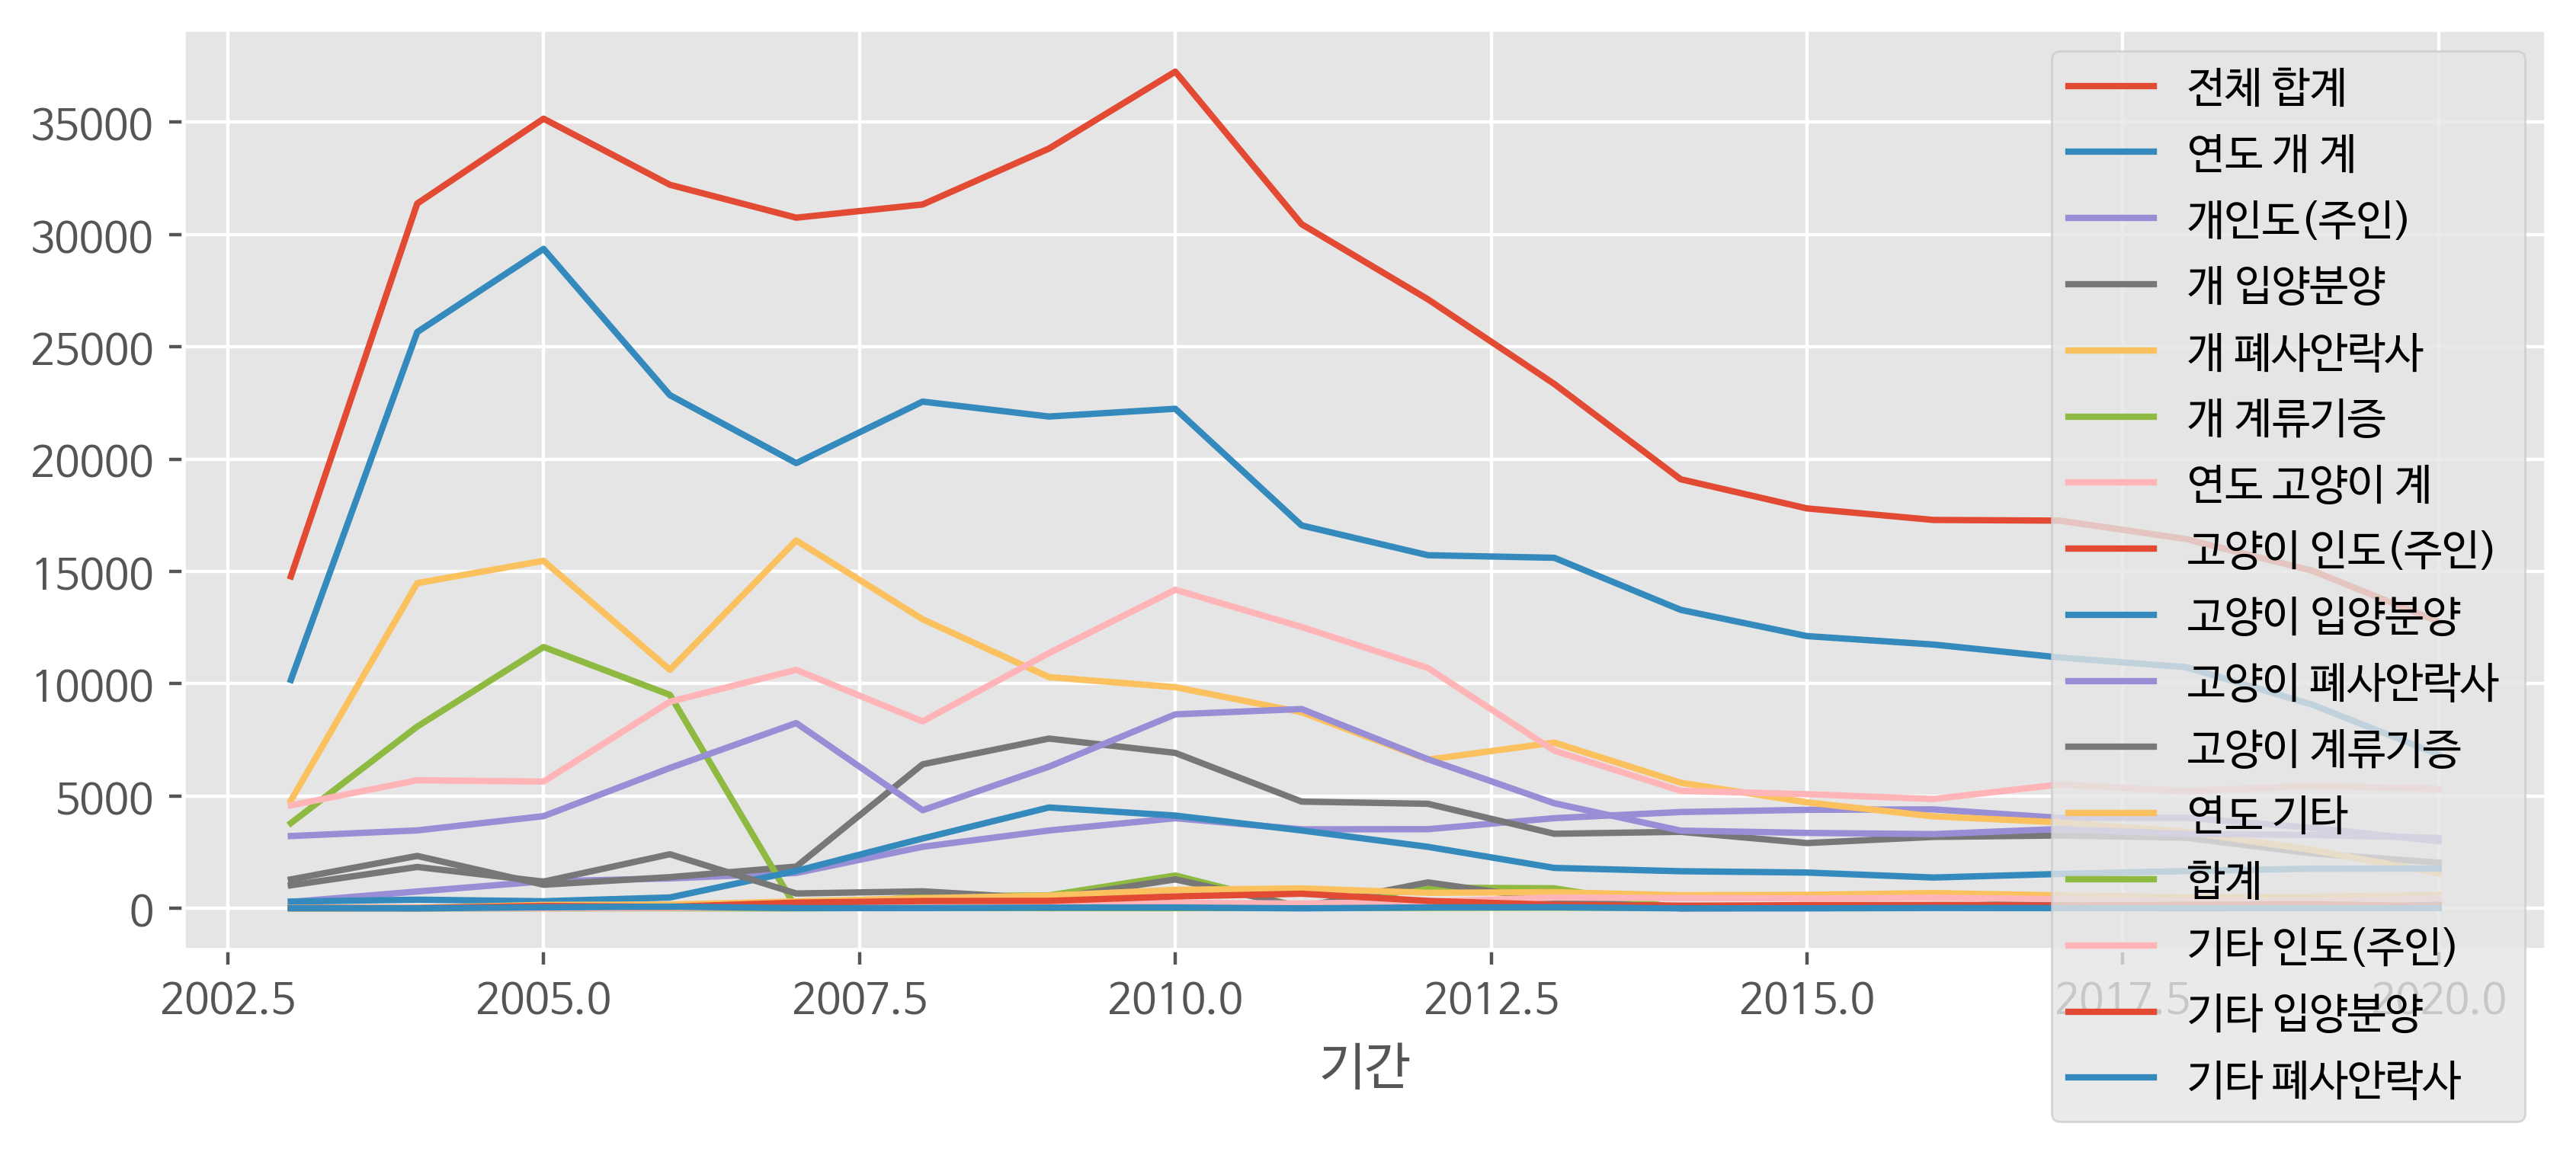

In [22]:
df_year_sum.plot()


In [23]:
df_year_pivot = df_year_sum.pivot_table(columns='기간')
df_year_pivot

기간,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
개 계류기증,3794.0,8092.0,11634.0,9504.0,10.0,536.0,576.0,1462.0,46.0,922.0,892.0,0.0,112.0,62.0,66.0,152.0,434.0,268.0
개 입양분양,1288.0,2334.0,1050.0,1390.0,1858.0,6412.0,7558.0,6920.0,4752.0,4654.0,3320.0,3406.0,2906.0,3180.0,3244.0,3144.0,2444.0,2034.0
개 폐사안락사,4802.0,14478.0,15472.0,10620.0,16378.0,12870.0,10294.0,9846.0,8730.0,6620.0,7380.0,5594.0,4716.0,4096.0,3830.0,3406.0,2600.0,1554.0
개인도(주인),286.0,750.0,1202.0,1332.0,1574.0,2740.0,3466.0,4012.0,3518.0,3524.0,4014.0,4288.0,4386.0,4406.0,4028.0,4034.0,3588.0,2988.0
고양이 계류기증,1026.0,1842.0,1190.0,2408.0,662.0,758.0,432.0,1288.0,62.0,1154.0,372.0,0.0,20.0,50.0,294.0,98.0,278.0,298.0
고양이 인도(주인),40.0,4.0,34.0,56.0,40.0,86.0,134.0,130.0,122.0,170.0,168.0,120.0,110.0,140.0,158.0,142.0,142.0,110.0
고양이 입양분양,300.0,386.0,316.0,484.0,1666.0,3110.0,4490.0,4130.0,3468.0,2738.0,1800.0,1652.0,1594.0,1372.0,1532.0,1660.0,1766.0,1772.0
고양이 폐사안락사,3218.0,3470.0,4104.0,6250.0,8250.0,4368.0,6306.0,8636.0,8874.0,6638.0,4678.0,3460.0,3358.0,3304.0,3532.0,3314.0,3266.0,3136.0
기타 인도(주인),10.0,10.0,2.0,20.0,42.0,88.0,192.0,244.0,214.0,296.0,482.0,456.0,442.0,474.0,406.0,304.0,294.0,438.0
기타 입양분양,4.0,10.0,104.0,68.0,254.0,326.0,332.0,530.0,652.0,332.0,158.0,100.0,144.0,146.0,118.0,154.0,182.0,90.0


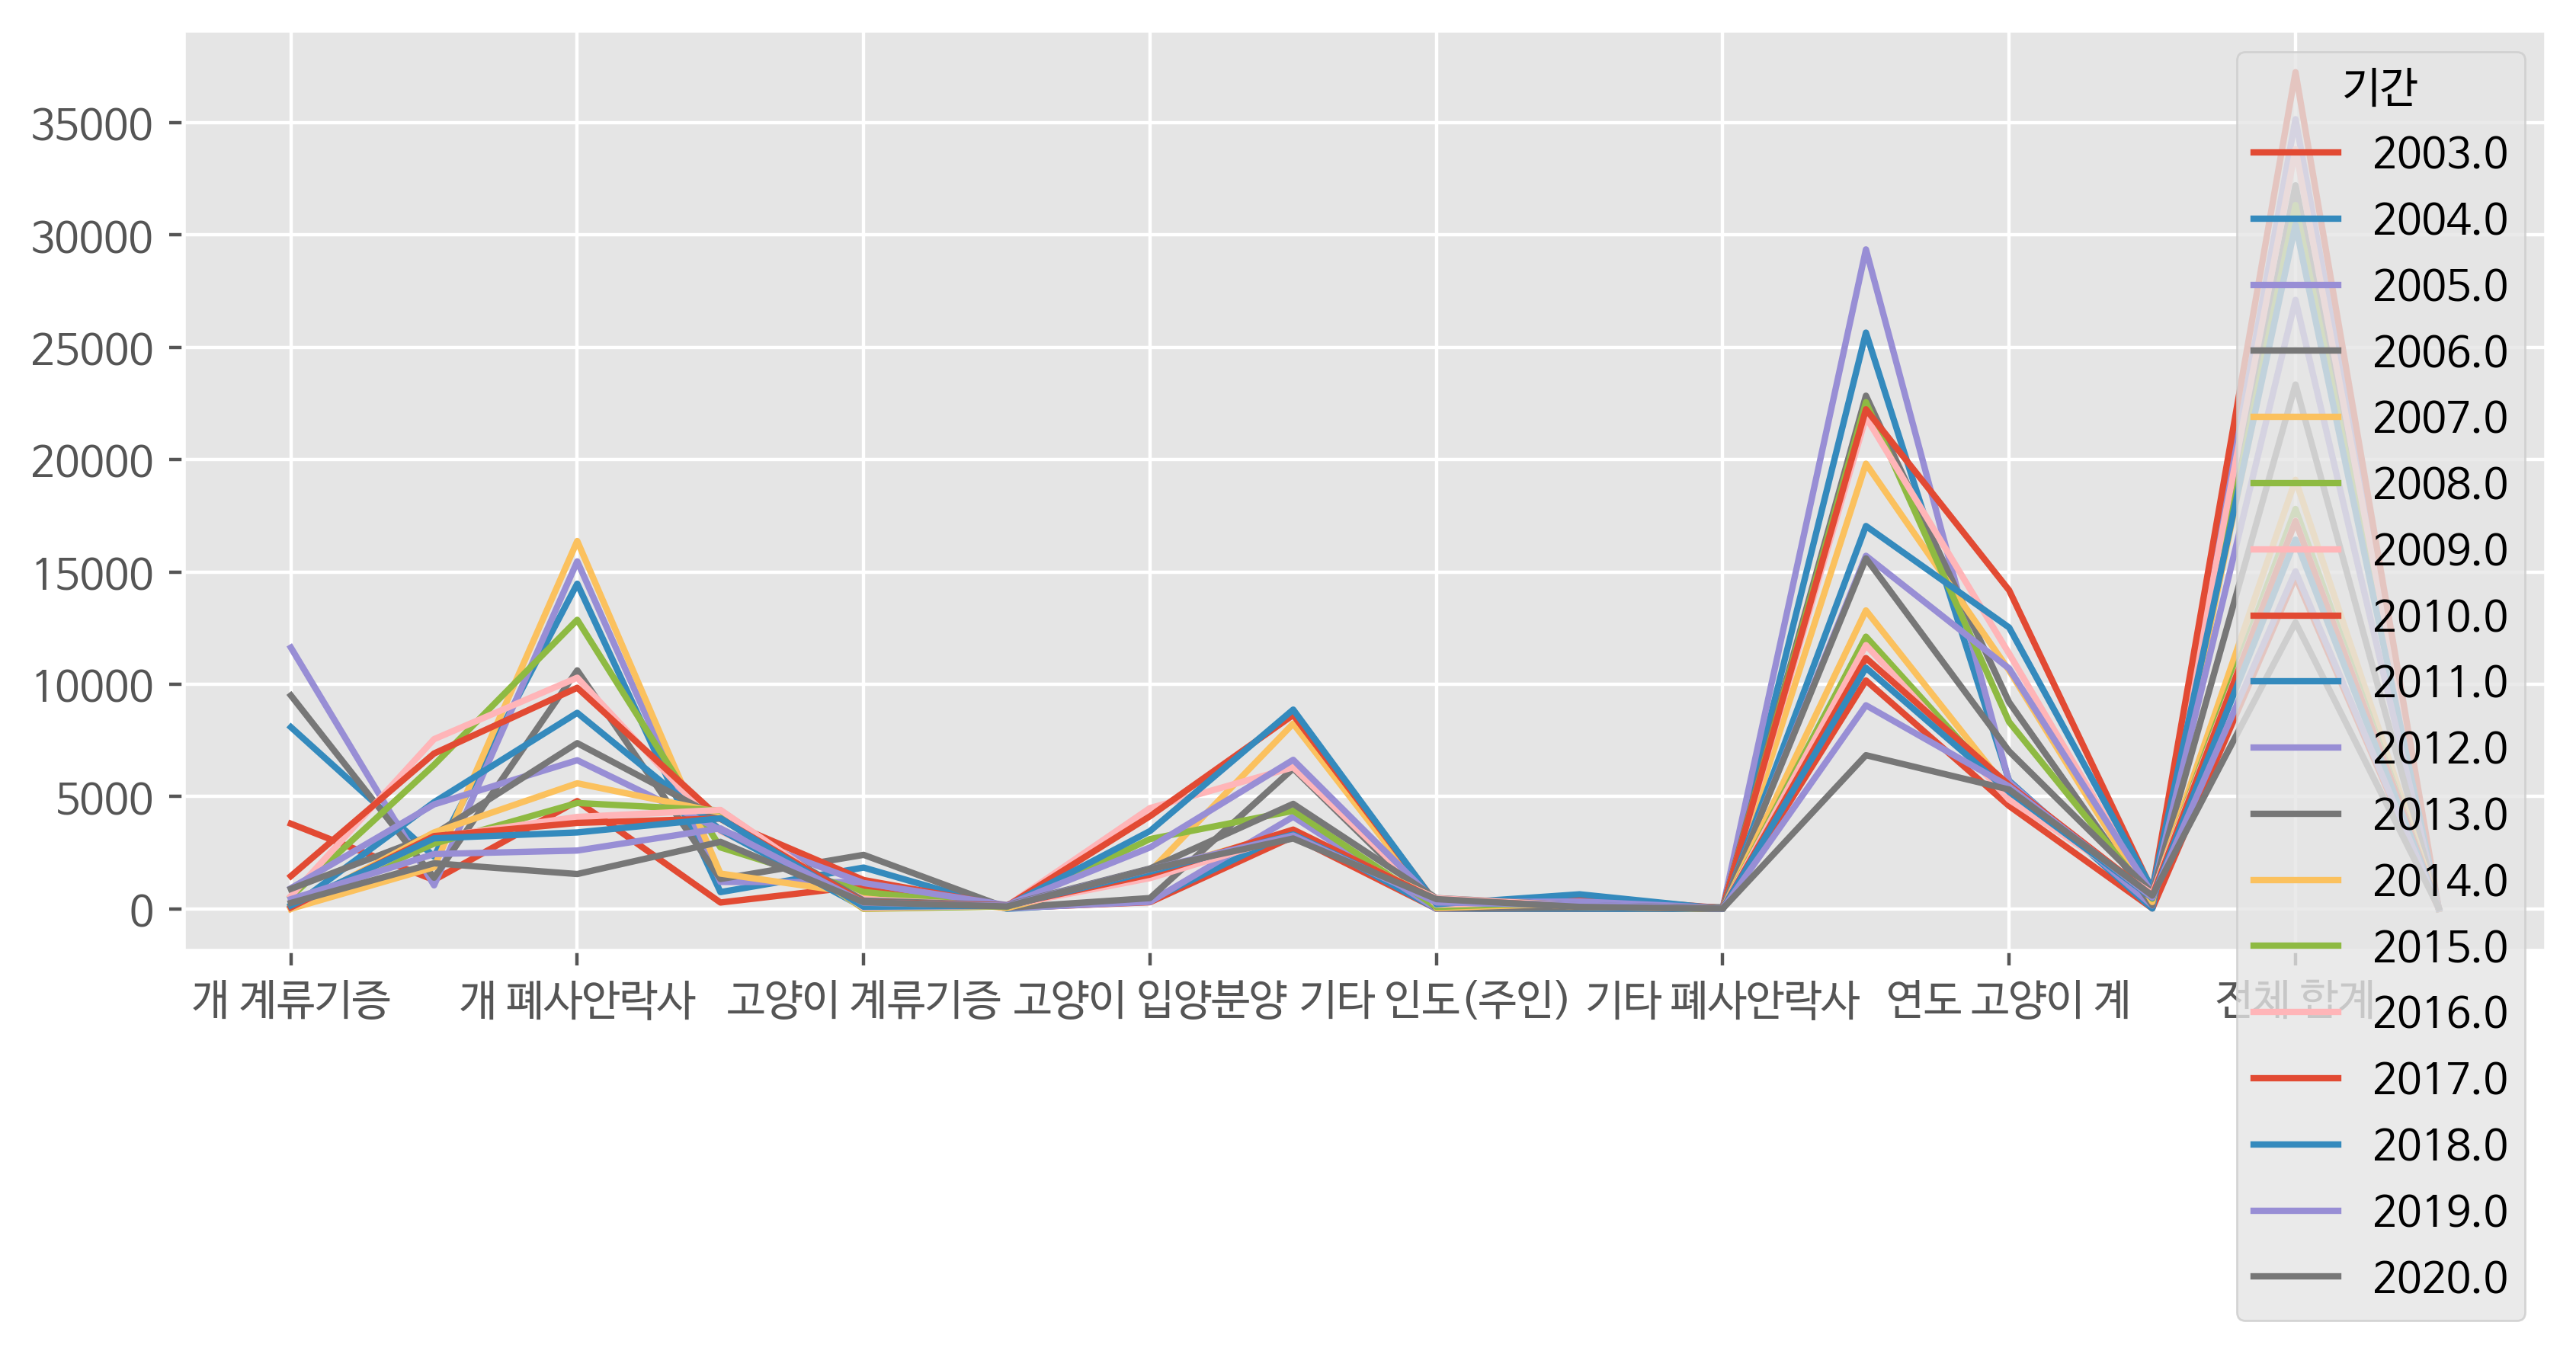

In [24]:
df_year_pivot.plot()

- 유기견이 주인을 찾아가는 경우와 입양되는경우, 안락사의 경우를 그래프로 비교

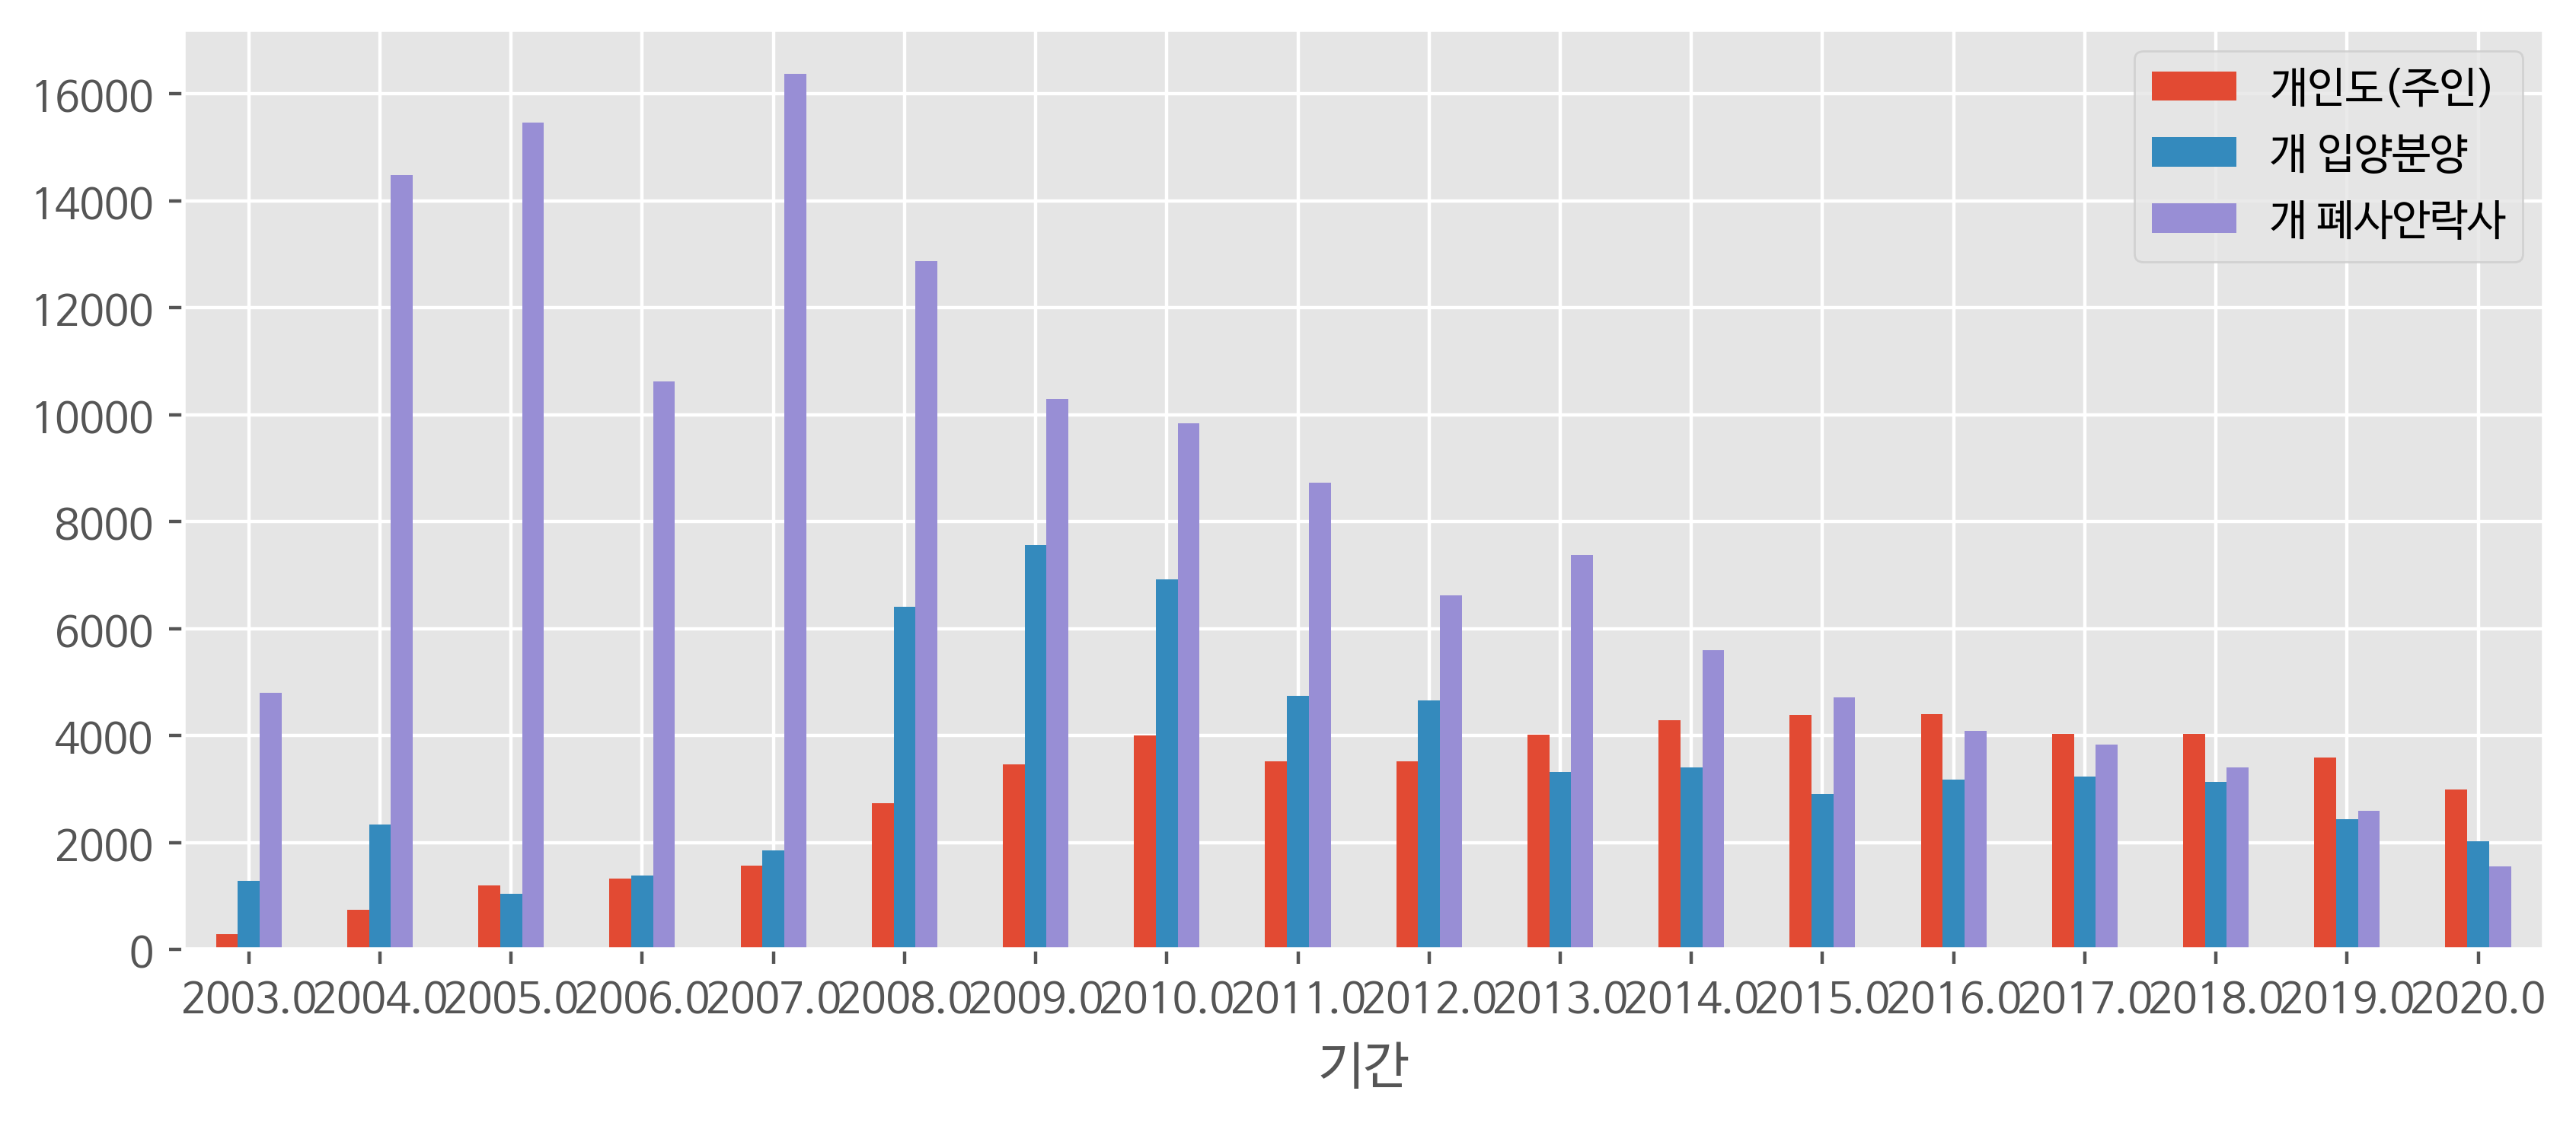

In [25]:
df_year_sum.iloc[:,2:5].plot.bar(rot=0)

**고양이가 주인을 찾게되는 경우와 입양가는 경우, 안락사 당하는 경우를 그래프로 비교**

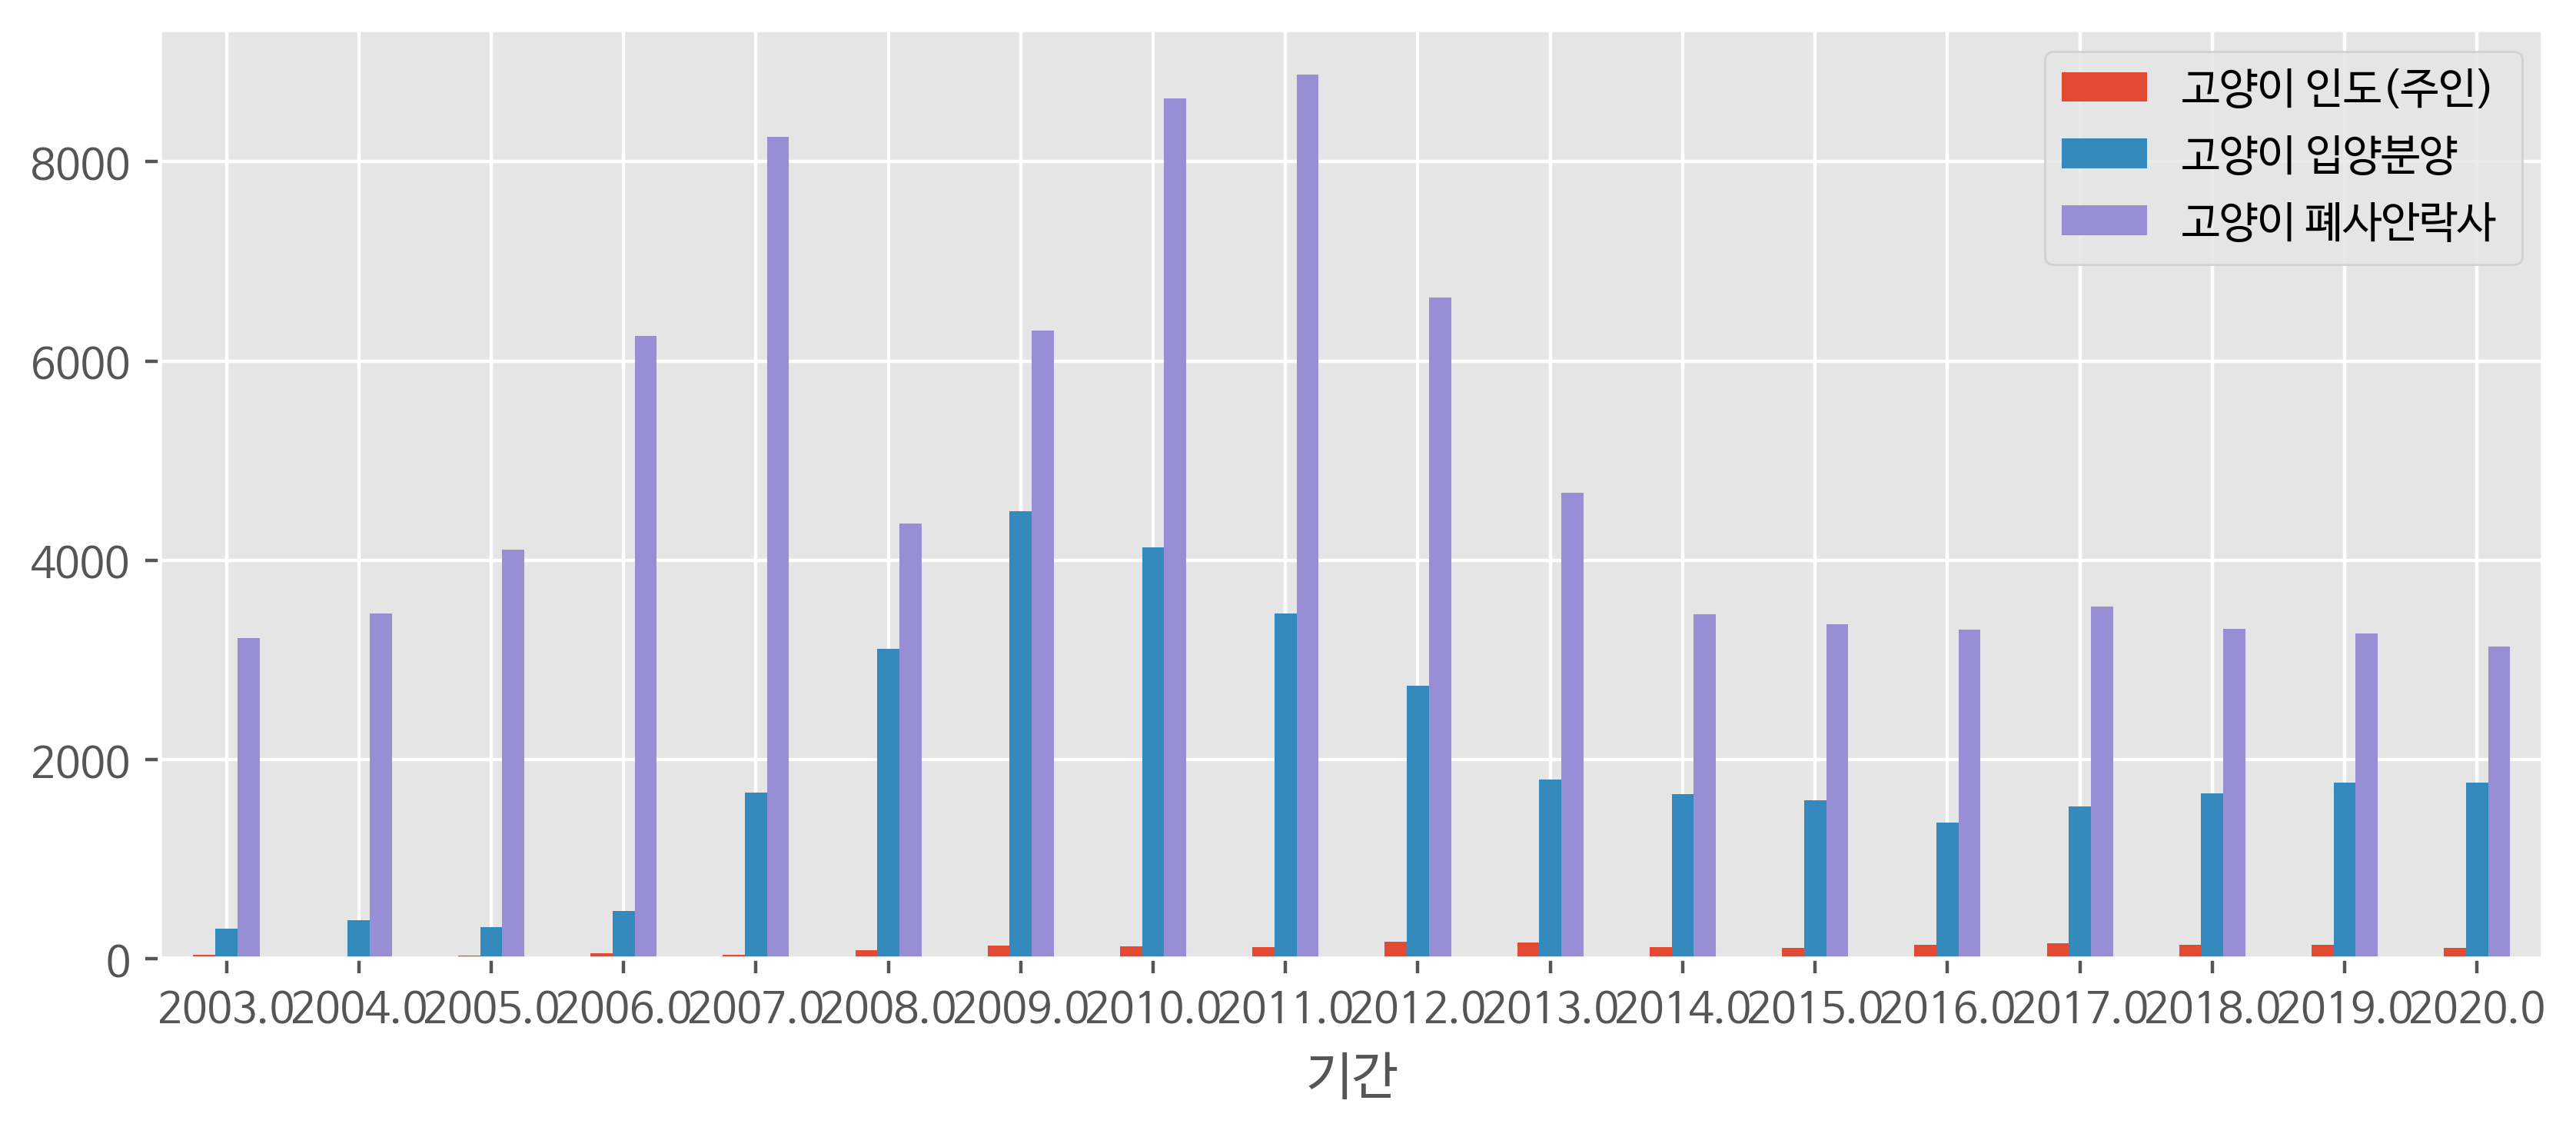

In [26]:
df_year_sum.iloc[:,7:10].plot.bar(rot=0)

In [27]:
df_year_sum

,전체 합계,연도 개 계,개인도(주인),개 입양분양,개 폐사안락사,개 계류기증,연도 고양이 계,고양이 인도(주인),고양이 입양분양,고양이 폐사안락사,고양이 계류기증,연도 기타,합계,기타 인도(주인),기타 입양분양,기타 폐사안락사
기간,,,,,,,,,,,,,,,,
2003.0,14778.0,10170.0,286.0,1288.0,4802.0,3794.0,4584.0,40.0,300.0,3218.0,1026.0,24.0,0.0,10.0,4.0,10.0
2004.0,31376.0,25654.0,750.0,2334.0,14478.0,8092.0,5702.0,4.0,386.0,3470.0,1842.0,20.0,0.0,10.0,10.0,0.0
2005.0,35154.0,29358.0,1202.0,1050.0,15472.0,11634.0,5644.0,34.0,316.0,4104.0,1190.0,152.0,0.0,2.0,104.0,46.0
2006.0,32212.0,22846.0,1332.0,1390.0,10620.0,9504.0,9198.0,56.0,484.0,6250.0,2408.0,168.0,4.0,20.0,68.0,76.0
2007.0,30746.0,19820.0,1574.0,1858.0,16378.0,10.0,10618.0,40.0,1666.0,8250.0,662.0,308.0,0.0,42.0,254.0,12.0
2008.0,31334.0,22558.0,2740.0,6412.0,12870.0,536.0,8322.0,86.0,3110.0,4368.0,758.0,454.0,26.0,88.0,326.0,14.0
2009.0,33822.0,21894.0,3466.0,7558.0,10294.0,576.0,11362.0,134.0,4490.0,6306.0,432.0,566.0,10.0,192.0,332.0,32.0
2010.0,37248.0,22240.0,4012.0,6920.0,9846.0,1462.0,14184.0,130.0,4130.0,8636.0,1288.0,824.0,12.0,244.0,530.0,38.0
2011.0,30458.0,17046.0,3518.0,4752.0,8730.0,46.0,12526.0,122.0,3468.0,8874.0,62.0,886.0,20.0,214.0,652.0,0.0


In [28]:
#강아지 유기된 비율 vs 고양이 유기된 비율
df_year_sum['연도 개 계'].sum()


297878.0

In [29]:
df_year_sum['연도 고양이 계'].sum()

136536.0

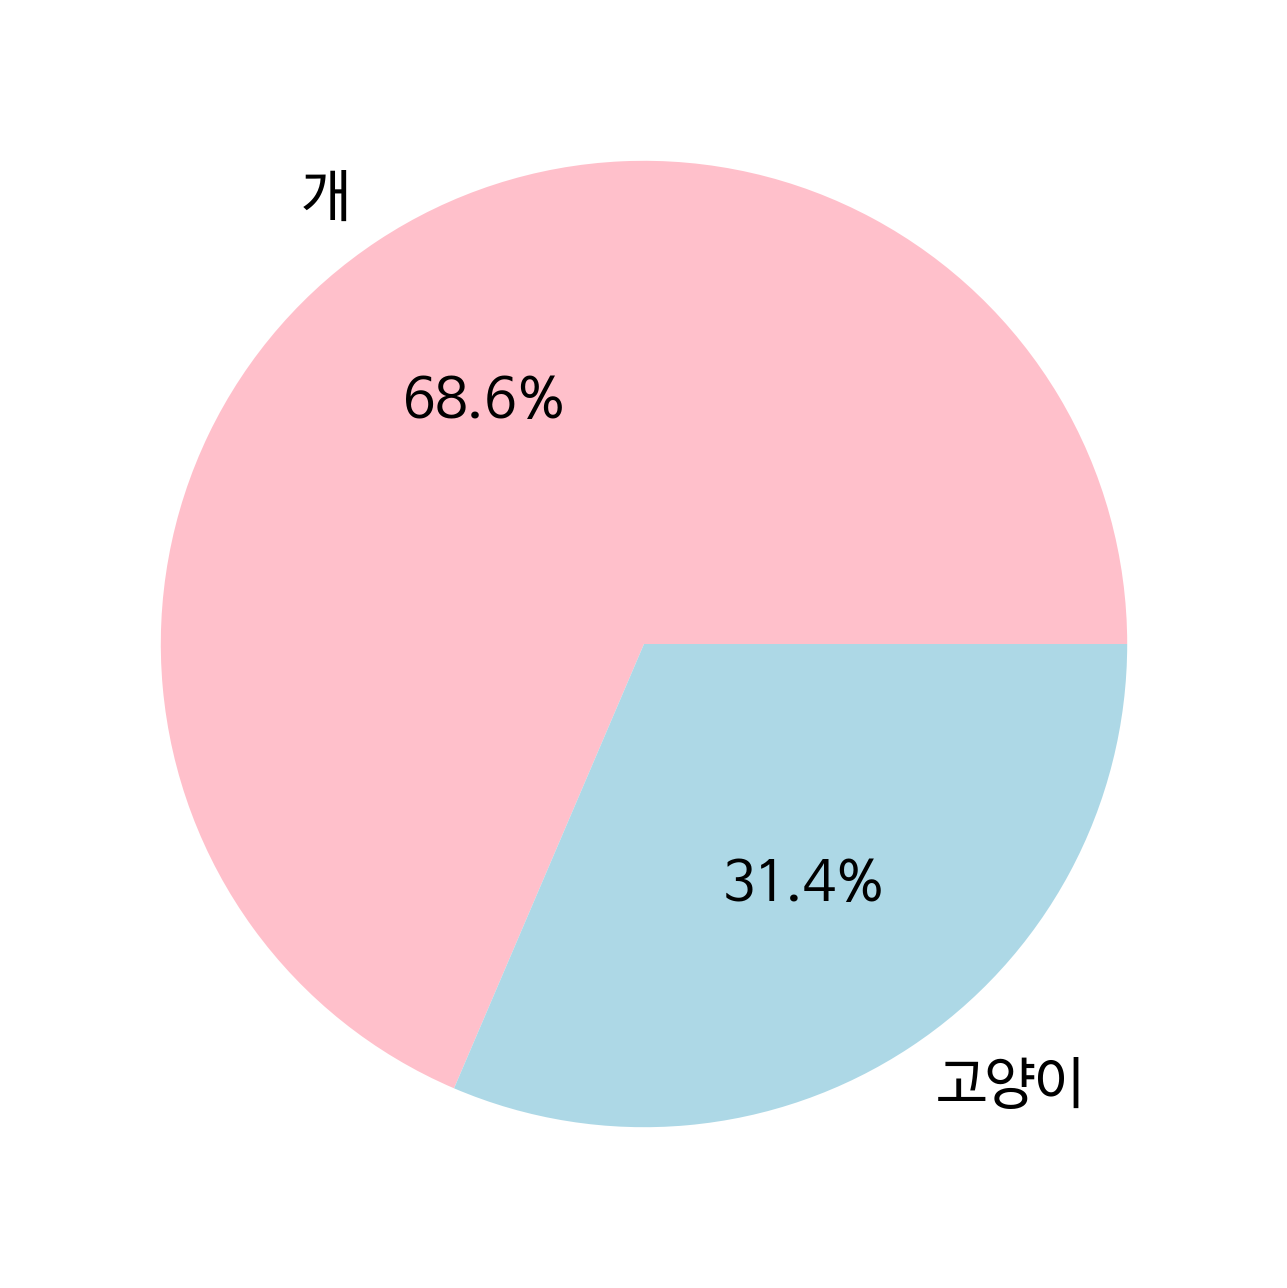

In [30]:
plt.pie([df_year_sum['연도 개 계'].sum(), df_year_sum['연도 고양이 계'].sum()], labels = ["개","고양이"], autopct='%.1f%%', colors = ["pink", "lightblue"])
plt.show()

강아지 고양이 주인에게 인도되는 비율

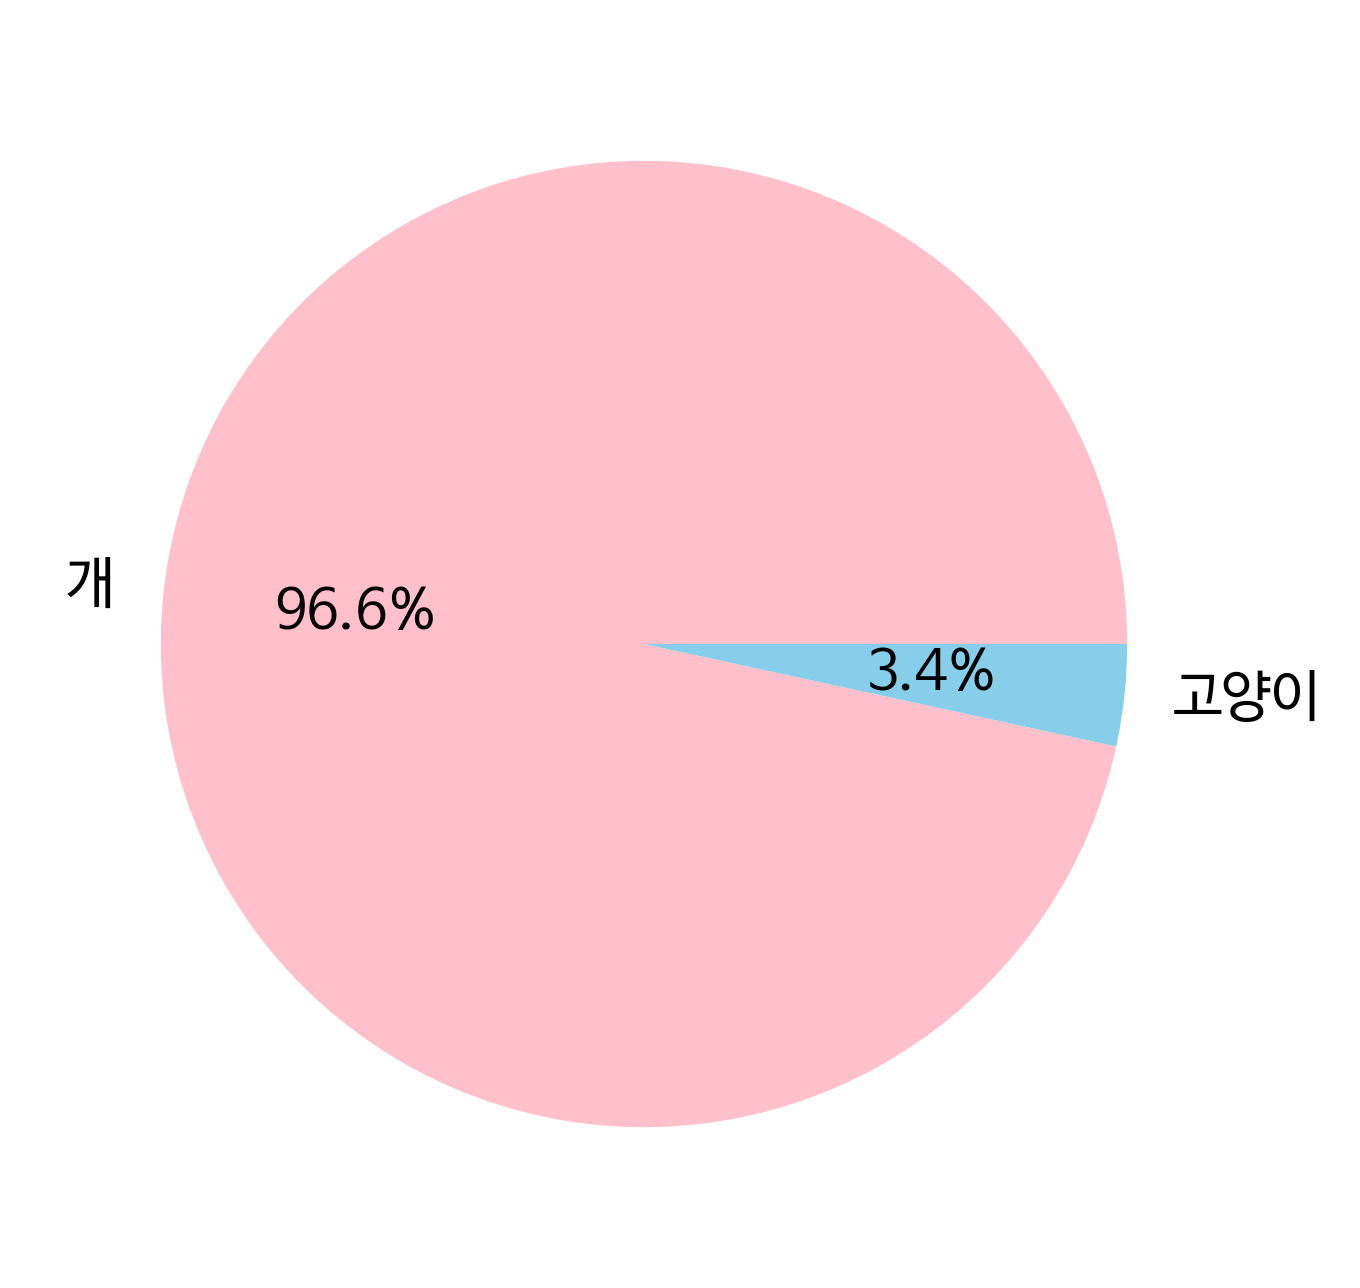

In [31]:
df_year_sum['개인도(주인)'].sum()
df_year_sum['고양이 인도(주인)'].sum()
plt.pie([df_year_sum['개인도(주인)'].sum(), df_year_sum['고양이 인도(주인)'].sum()], labels = ["개","고양이"], autopct='%.1f%%', colors = ["pink", "skyblue"])
plt.show()

In [32]:
df

,기간,전체 합계,연도 개 계,개인도(주인),개 입양분양,개 폐사안락사,개 계류기증,연도 고양이 계,고양이 인도(주인),고양이 입양분양,고양이 폐사안락사,고양이 계류기증,연도 기타,합계,기타 인도(주인),기타 입양분양,기타 폐사안락사
자치구,,,,,,,,,,,,,,,,,
합계,2003.0,7389.0,5085.0,143.0,644.0,2401.0,1897.0,2292.0,20.0,150.0,1609.0,513.0,12.0,0.0,5.0,2.0,5.0
종로구,2003.0,153.0,107.0,1.0,29.0,24.0,53.0,46.0,0.0,1.0,30.0,15.0,0.0,0.0,0.0,0.0,0.0
중구,2003.0,187.0,103.0,1.0,5.0,52.0,45.0,84.0,0.0,3.0,56.0,25.0,0.0,0.0,0.0,0.0,0.0
용산구,2003.0,233.0,130.0,0.0,12.0,73.0,45.0,103.0,0.0,5.0,85.0,13.0,0.0,0.0,0.0,0.0,0.0
성동구,2003.0,127.0,119.0,3.0,0.0,33.0,83.0,8.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
관악구,2020.0,693.0,301.0,149.0,138.0,9.0,5.0,359.0,5.0,284.0,67.0,3.0,33.0,2.0,29.0,2.0,0.0
서초구,2020.0,163.0,94.0,27.0,20.0,44.0,3.0,54.0,0.0,4.0,42.0,8.0,15.0,0.0,12.0,3.0,0.0
강남구,2020.0,254.0,136.0,50.0,56.0,23.0,7.0,109.0,5.0,18.0,76.0,10.0,9.0,2.0,6.0,1.0,0.0


In [33]:
#df.groupby(['개 폐사안락사', "고양이 폐사안락사"])
#df_all_sum = df[['개 폐사안락사', "고양이 폐사안락사"]]
#df.groupby(['기간'])
df_all_sum = df[['기간','개 폐사안락사','고양이 폐사안락사 ']]
#for i in x:
#  print(i)

In [34]:
df_all_sum

,기간,개 폐사안락사,고양이 폐사안락사
자치구,,,
합계,2003.0,2401.0,1609.0
종로구,2003.0,24.0,30.0
중구,2003.0,52.0,56.0
용산구,2003.0,73.0,85.0
성동구,2003.0,33.0,3.0
...,...,...,...
관악구,2020.0,9.0,67.0
서초구,2020.0,44.0,42.0
강남구,2020.0,23.0,76.0


In [35]:
df_ex_dead = df_all_sum.reset_index()
df_ex_dead

,자치구,기간,개 폐사안락사,고양이 폐사안락사
0,합계,2003.0,2401.0,1609.0
1,종로구,2003.0,24.0,30.0
2,중구,2003.0,52.0,56.0
3,용산구,2003.0,73.0,85.0
4,성동구,2003.0,33.0,3.0
...,...,...,...,...
463,관악구,2020.0,9.0,67.0
464,서초구,2020.0,44.0,42.0
465,강남구,2020.0,23.0,76.0
466,송파구,2020.0,31.0,90.0


In [36]:
df_ex_dead= df_all_sum.reset_index()
df_ex_dead_dog = df_ex_dead[['자치구','개 폐사안락사']].groupby(by=['자치구'], as_index=False).sum()
df_ex_dead_dog = df_ex_dead_dog.iloc[:25,:]
df_ex_dead_cat = df_ex_dead[['자치구', '고양이 폐사안락사 ']].groupby(by=['자치구'], as_index=False).sum()
df_ex_dead_cat = df_ex_dead_cat.iloc[:25,:]

In [37]:
df_ex_dead_dog

,자치구,개 폐사안락사
0,강남구,1656.0
1,강동구,2630.0
2,강북구,4101.0
3,강서구,4763.0
4,관악구,2591.0
5,광진구,3176.0
6,구로구,3064.0
7,금천구,2370.0
8,노원구,3099.0
9,도봉구,3503.0


In [38]:
# 각 자치구 별 안락사 비율

import plotly.express as px
fig = px.bar(df_ex_dead_dog, x='개 폐사안락사', y='자치구', color='자치구',
            orientation='h', title='각 자치구 별 개 폐사안락사 비율')
fig.show()

In [39]:
fig = px.bar(df_ex_dead_cat, x='고양이 폐사안락사 ', y='자치구', color='자치구',
             orientation='h', title='각 자치구 별 고양이 폐사안락사 비율')
fig.show()

In [40]:
import folium
map = folium.Map(location=[37.5662952,126.9779451],zoom_start=12)
map

각 자치구 별 유기동물 CircleMarker 지도에 표출하기

In [41]:
lat = [37.5172363, 37.53051, 37.6397767, 37.5509103, 37.4781285, 37.5385333, 37.4954703, 37.4567667, 37.6540471, 37.6687735, 37.5744155,
      37.5124298, 37.5662001,37.57917279999999,37.483574, 37.5630554, 37.589366,37.5144161,37.5169508,37.526344,37.5325896,37.6027496,
      37.5727864,37.5637584,37.60656] #위도

long = [127.0473248, 127.120535,127.0255184,126.8495742,126.9515024,127.0823772,126.8876391,126.8954005,
        127.0563372,127.047071,127.0397427,126.9397997,126.9016437,126.9367815,127.032661,127.0367125,
        127.016743,127.1060657,126.8665644,126.896256,126.9900429,126.9292386,126.9791778,126.9975517,
        127.092624]
        

In [42]:
df_ex['위도'] = lat
df_ex['경도'] = long
# 열을 추가할 때 리스트의 이름을 넣으면 쉽게 열을 만들 수 있다.

In [43]:
# 지도에 필요한 정보만 담기 (서울)

gu = ['강남구','강동구','강북구	','강서구','관악구','광진구','구로구','금천구','노원구','도봉구',
      '동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구',
      '용산구','은평구','종로구','중구','중랑구']
for i in range(len(gu)):
  df_seoulnmap = df_ex[df_ex.자치구 == gu[i]]
  # print(df_seoulnmap)
  for n in df_seoulnmap.index:
    #print(n)
    cnt = df_seoulnmap['전체 합계'][n]
    # print(cnt)
    folium.CircleMarker([df_seoulnmap['위도'][n], df_seoulnmap['경도'][n]],
                       radius=cnt/250, popup = df_seoulnmap['자치구'][n],fill_color='#b30b0b').add_to(map)

map